# Exercise 8 Solutions 

Here, we will present the solutions to Exercise 8 and use the [package]() that was created for this exercise. 

First, we use the package to reproduce the results from the lecture: we will inspect the 0D EBM with $\tanh$-albedo and a reduced Stefan-Boltzmann outgoing radiation: 

In [1]:
using OrdinaryDiffEq, Exercise8, Plots

model = ZeroDEBM(R_in=IncomingRadiation(α=TanhAlbedo()), R_out=StefanBoltzmannRadiation()) 

# model = ZeroDEBM() # would have achieved the same, it is the default constructor

┌ Info: Precompiling Exercise8 [ad5a52e4-ee06-4f3f-ac2d-a72b939a0981]
└ @ Base loading.jl:1423


ZeroDEBM{Float64}
  R_in: IncomingRadiation{Float64, TanhAlbedo{Float64}}
  R_out: StefanBoltzmannRadiation{Float64}


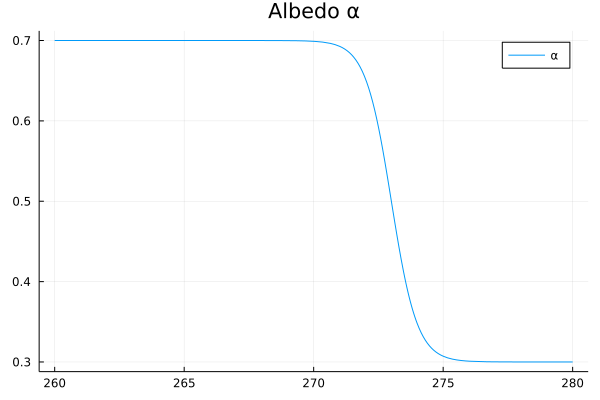

In [2]:
plot(T->model.R_in.α(T), xlims=[260,280], label="α", title="Albedo α")

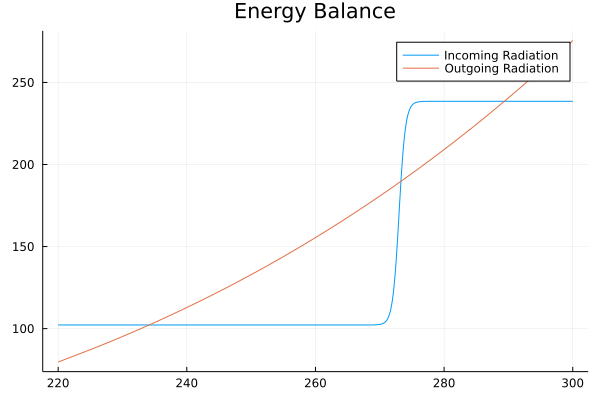

In [3]:
plot(T->model.R_in(T), xlims=[220,300], label="Incoming Radiation", title="Energy Balance")
plot!(T->model.R_out(T), label="Outgoing Radiation")

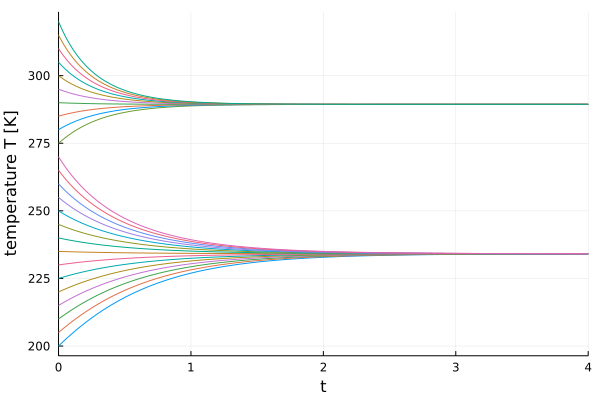

In [4]:
prob = ODEProblem(model, 270., (0.,4.), [])

u0s = 200:5:320

fig = plot(0,0,xlabel="time",ylabel="temperature T [K]", legend=nothing, title="Fixed Points")
for u0 ∈ u0s 
    plot!(fig, solve(remake(prob;u0=[u0]),Tsit5()),label=nothing)
end 
fig

So, we just reproduced the results from the lecture. Now, we can also test Budyko's linear radiation ansatz: 

In [5]:
model_budyko = ZeroDEBM(R_out=BudykoRadiation()) 

ZeroDEBM{Float64}
  R_in: IncomingRadiation{Float64, TanhAlbedo{Float64}}
  R_out: BudykoRadiation{Float64}


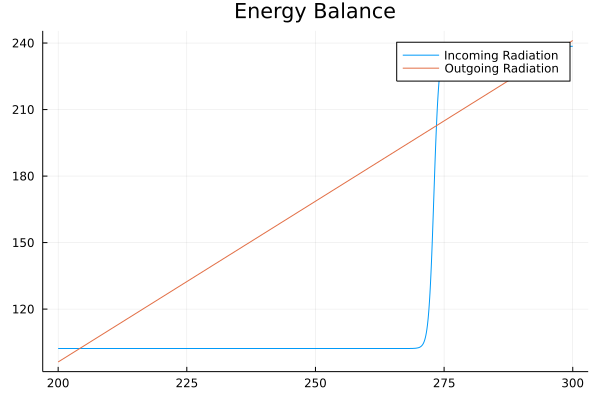

In [6]:
plot(T->model_budyko.R_in(T), xlims=[200,300], label="Incoming Radiation", title="Energy Balance")
plot!(T->model_budyko.R_out(T), label="Outgoing Radiation")

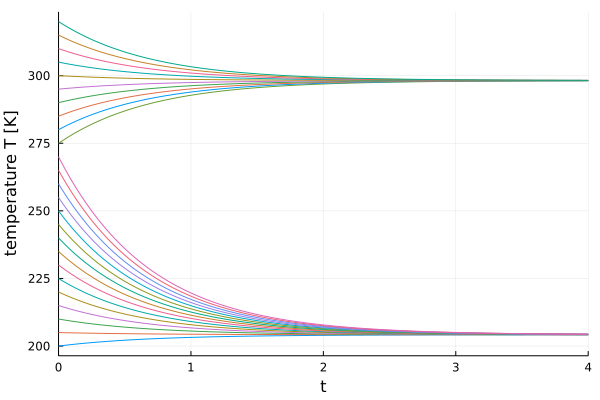

In [7]:
prob = ODEProblem(model_budyko, 270., (0.,4.), [])

u0s = 200:5:320

fig = plot(0,0,xlabel="time",ylabel="temperature T [K]", legend=nothing, title="Fixed Points Budyko's")
for u0 ∈ u0s 
    plot!(fig, solve(remake(prob;u0=[u0]),Tsit5()),label=nothing)
end 
fig

Compared to the approach of using the reduced Stefan-Boltzmann law, Budyko's approach results in the fixed points further apart at lower and higher temperatures. 

Now, for another we can test an albedo that is piecewise linear, exhibiting constant albedo outside of on interval $[T_0;T_1]$: 

$$\begin{align} 
\alpha(T) = \begin{cases} \alpha_{max}\quad\text{if } T<=T_0\\ 
\frac{\alpha_{min} - \alpha_{max}}{T_1 - T_0}(T - T_0) + \alpha_{max}\quad\text{if }T_0<T<T_1\\   \alpha_{min}\quad\text{if } T>=T_1 \end{cases}  \end{align}$$


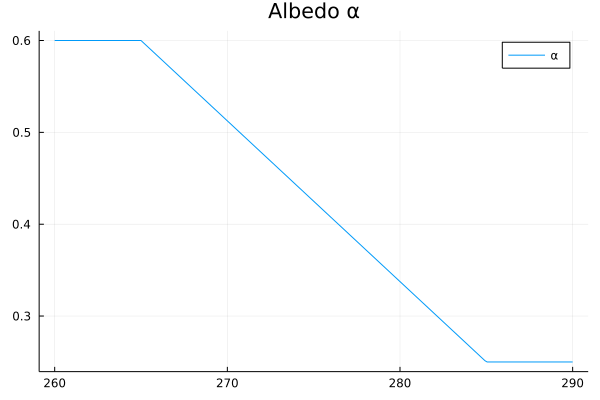

In [8]:
model_linear_albedo = ZeroDEBM(R_in=IncomingRadiation(α=PiecewiseLinearAlbedo()))

plot(T->model_linear_albedo.R_in.α(T), xlims=[260,290], label="α", title="Albedo α")

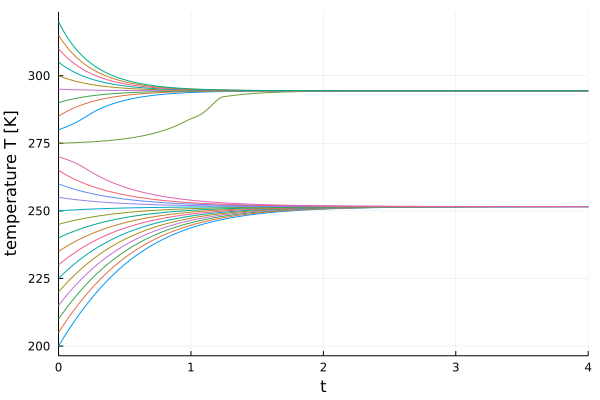

In [9]:
prob = ODEProblem(model_linear_albedo, 270., (0.,4.), [])

u0s = 200:5:320

fig = plot(0,0,xlabel="time",ylabel="temperature T [K]", legend=nothing, title="Fixed Points Budyko's")
for u0 ∈ u0s 
    plot!(fig, solve(remake(prob;u0=[u0]),Tsit5()),label=nothing)
end 
fig

For this albedo we've got a much warmer cold state.